## Introduction

In [1]:
!pygmentize helper_scripts/lda.py

from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm

plt.rcParams["figure.figsize"] = (22, 10)
plt.style.use("seaborn-whitegrid")


class LDA:
    def __init__(self, training_samples):
        self.texts = training_samples
        self.docs = [data.split() for data in self.texts]
        self.dictionary = corpora.Dictionary(self.docs)
        self.bow_corpus = [self.dictionary.doc2bow(doc) for doc in self.docs]

    def __iter__(self):
        self.length = len(self.texts)
        self.n = 0
        return self

    def __next__(self):
        token = self.bow_corpus[self.n]
        self.n += 1
        if self.n == self.length:
            self.n == 1
        return [(self.dictionary[ii], freq) for ii, freq in token]

    def filter_extremes(self, keep_n, no_below, no_above):
        self.dictionary.filter_extremes(
            keep_n=keep_n, no_below=no_below,

            or type(topics) == int
        ), 'topics only accepts "all", an integer, or an iterable'
        if type(topics) == int:
            topics = [topics]
        elif topics.lower().strip() == "all":
            topics = np.unique(self.training_samples_prediction_)
        z = [[i] for i in topics]

        if topic_names != None:
            assert (
                hasattr(topic_names, "__iter__") or type(topic_names) == str
            ), "topic_names must be an a string, an iterable or None"
            if type(topic_names) == str:
                assert (
                    len(topics) == 1
                ), "Only accept integers for topics when topic_names data type is a string"
                topic_names = [topic_names]
            else:
                assert len(topics) == len(
                    topic_names
                ), "topics and topic_names length must be the same."
            z = zip(topics, topic_names)

        for i in z:
            samples = self

## Jupyter Notebook Setup

In [ ]:
## Enable developer mode in current notebook
%load_ext autoreload
%autoreload 2

In [2]:
## Import Libraries
from helper_scripts import lda
import os
import pickle
import re
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Plotly renderer setup.
import plotly.io as pio
pio.renderers.default = 'iframe+colab+notebook'

## Reading The Data

In [4]:
df = pd.read_parquet('../cleaned_data/cleaned_reviews.parquet.gzip')
df.head()

,title,date,location,rating,text,title_clean,text_clean
0,"Which iPhone you should Purchase ? iPhone 8, X...",2018-12-12,India,3.0,NOTE:@ This is detailed comparison between iPh...,iphon purchas iphon 8 x xs xr,note comparison iphon 8 x xs xr month state ba...
1,Don't buy iPhone xr from Amazon.,2018-11-17,India,1.0,Very bad experience with this iPhone xr phone....,don t buy iphon xr amazon,experi iphon xr camera find amazon haven t get...
2,Happy with the purchase,2019-01-27,India,5.0,Amazing phone with amazing camera coming from ...,purchas,camera come iphon 7 plus servic amazon
3,Amazon is not an apple authorised reseller. Pl...,2019-05-02,India,1.0,So I got the iPhone XR just today. The product...,amazon appl resel note,get iphon xr today product look face d work gl...
4,Excellent Battery life and buttery smooth UI,2019-05-24,India,5.0,I've been an android user all my life until I ...,excel batteri life butteri ui,ve android user life decid tri iphon xr io lov...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        3277 non-null   object        
 1   date         3277 non-null   datetime64[ns]
 2   location     3277 non-null   object        
 3   rating       3277 non-null   float32       
 4   text         3277 non-null   object        
 5   title_clean  3277 non-null   object        
 6   text_clean   3277 non-null   object        
dtypes: datetime64[ns](1), float32(1), object(5)
memory usage: 166.5+ KB


## LDA

### Initializing the model

In [6]:
lda_model = lda.LDA(df['text_clean'])

In [7]:
# sanity check on data
it = iter(lda_model)
it = next(it)
it.insert(0, ('word', 'frequency'))
it[:30]

[('word', 'frequency'),
 ('1', 1),
 ('11', 1),
 ('12', 1),
 ('14', 1),
 ('15', 1),
 ('16', 1),
 ('18', 1),
 ('20', 1),
 ('4', 3),
 ('4k', 1),
 ('5', 1),
 ('6', 3),
 ('64', 1),
 ('7', 2),
 ('75kxr', 1),
 ('77kxs', 1),
 ('8', 19),
 ('80k', 1),
 ('9', 1),
 ('99k', 1),
 ('accord', 1),
 ('aluminum', 1),
 ('appear', 1),
 ('batteri', 4),
 ('bodi', 1),
 ('budget', 2),
 ('build', 1),
 ('button', 1),
 ('camera', 3)]

In [8]:
lda_model = lda.LDA(df['text_clean'])
lda_model.filter_extremes(keep_n=10000, no_below=10,  no_above = 0.3)
# sanity check on dictionary size
len(lda_model.dictionary)

417

### Training & evaluating the model

In [9]:
lda_model.fit(3)
## Evaluate the model
lda_model.print_output()

Topic: 0	Coherence Score: 0.6077
Words: 0.060*"iphon" + 0.034*"xr" + 0.031*"price" + 0.027*"qualiti" + 0.027*"camera" + 0.020*"appl" + 0.019*"product" + 0.017*"batteri" + 0.015*"use" + 0.015*"featur"

########

Topic: 1	Coherence Score: 0.3773
Words: 0.098*"product" + 0.037*"amazon" + 0.034*"buy" + 0.030*"love" + 0.027*"money" + 0.024*"iphon" + 0.023*"appl" + 0.022*"mobil" + 0.021*"like" + 0.019*"valu"

########

Topic: 2	Coherence Score: 0.4975
Words: 0.076*"batteri" + 0.047*"life" + 0.046*"camera" + 0.039*"iphon" + 0.028*"appl" + 0.023*"qualiti" + 0.020*"work" + 0.018*"product" + 0.016*"day" + 0.015*"perform"

########

Perplexity Score: -5.5061 
Overall Coherence Score: 0.4942


In [10]:
lda_model.score(df.sample(500)['text_clean'].apply(lambda x: x.split()), return_per_topic=True)

(0.31983246180795094,
 [0.32688883492508597, 0.31610754355973636, 0.3165010069390305])

### Visualizing training results

In [11]:
lda_model.visualize_topics_

### Hyperparameter tuning

tuning: 100%|██████████| 39/39 [08:00<00:00, 12.31s/it, max_coherence_score=0.495, best_params={'num_topics': 8, 'alpha': 'symmetric', 'beta': 'symmetric'}]


Finished hyperparameter tuning, model updated!


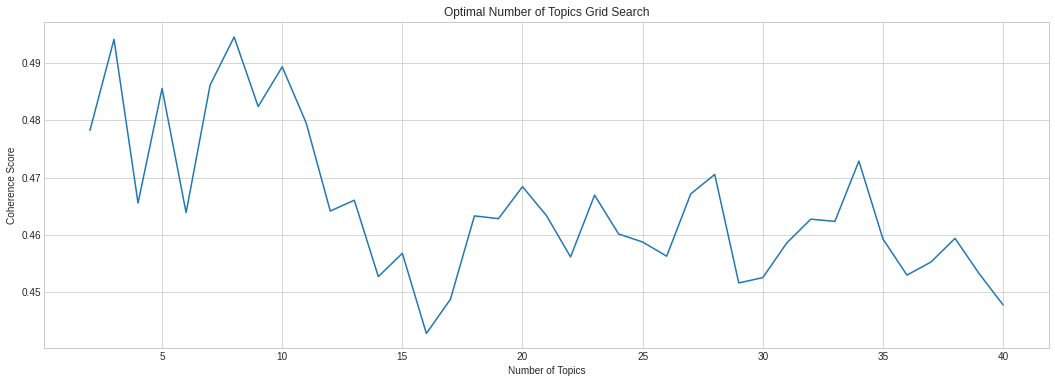

In [12]:
lda_model.find_best_num_topics()

In [ ]:
num_topic_range = range(2, 11)
alpha_range = list(np.arange(0.0, 1.01, 0.1))
alpha_range.append("symmetric")
alpha_range.append("asymmetric")
beta_range = list(np.arange(0.0, 1.01, 0.1))
beta_range.append("symmetric")

lda_model.tune(num_topic_range=num_topic_range, alpha_range=alpha_range, beta_range=beta_range)

tuning:  76%|███████▌  | 1070/1404 [2:27:35<28:20,  5.09s/it, max_coherence_score=0.517, best_params={'num_topics': 7, 'alpha': 'asymmetric', 'beta': 0.8}]                       

In [ ]:
path = "../app/models"
if not os.path.exists(path):
    os.makedirs(path)
    
with open(os.path.join(path, 'lda_model.sav'), 'wb') as f:
    pickle.dump(lda_model, f)

## LDA Result & Post Modeling Analysis

In [ ]:
lda_model.fit(**lda_model.best_params_, predict_training_samples=True)

lda_model.print_output()

In [ ]:
topic_names = [
    "Apple/iPhone's product pricing, battery, camera, and quality", #
    "Amazon's Product? (Unclear)",
    "Battery life, camera, quality, display", #
    "Satisfaction of switching from android to iPhone", #
    "iPhone XR's camera, battery, screen, quality, etc.", #
    "Something about iPhone and/or Amazon (Unclear)", #
    "Comparing iPhone With other phones and/or very detailed reviews" #
]


topics = '''
Topic: 0	Coherence Score: 0.4498
Words: 0.103*"product" + 0.060*"iphon" + 0.037*"appl" + 0.037*"price" + 0.035*"batteri" + 0.031*"camera" + 0.029*"qualiti" + 0.022*"xr" + 0.017*"life" + 0.015*"superb"

########

Topic: 1	Coherence Score: 0.3734
Words: 0.059*"product" + 0.059*"amazon" + 0.052*"love" + 0.049*"buy" + 0.047*"money" + 0.033*"valu" + 0.027*"mobil" + 0.026*"thank" + 0.017*"experi" + 0.016*"iphon"

########

Topic: 2	Coherence Score: 0.5568
Words: 0.121*"batteri" + 0.085*"life" + 0.048*"camera" + 0.028*"work" + 0.025*"face" + 0.022*"qualiti" + 0.020*"iphon" + 0.015*"display" + 0.013*"d" + 0.013*"perform"

########

Topic: 3	Coherence Score: 0.6137
Words: 0.042*"👍" + 0.032*"appl" + 0.023*"iphon" + 0.023*"👌" + 0.021*"android" + 0.019*"io" + 0.018*"user" + 0.018*"like" + 0.015*"batteri" + 0.013*"time"

########

Topic: 4	Coherence Score: 0.5056
Words: 0.055*"camera" + 0.041*"iphon" + 0.036*"qualiti" + 0.031*"xr" + 0.018*"batteri" + 0.017*"screen" + 0.016*"get" + 0.016*"buy" + 0.015*"work" + 0.015*"appl"

########

Topic: 5	Coherence Score: 0.3642
Words: 0.039*"s" + 0.032*"️" + 0.031*"expect" + 0.030*"appl" + 0.028*"iphon" + 0.023*"deliveri" + 0.022*"❤" + 0.021*"time" + 0.018*"amazon" + 0.015*"like"

########

Topic: 6	Coherence Score: 0.7580
Words: 0.048*"iphon" + 0.021*"t" + 0.020*"xr" + 0.016*"face" + 0.014*"3" + 0.014*"appl" + 0.014*"day" + 0.014*"7" + 0.013*"6" + 0.013*"2"
'''

topics = re.findall('(Topic: \d|Words:.*)', topics)

assert len(topics) / 2 == len(topic_names), "Number of given names doesn't match number of topics!"

topics = {k:', '.join(re.findall('"\w+"', topics[i + 1])) for k, i in zip(topic_names, range(0, len(topics), 2))}

for k, v in topics.items():
    print('topic:', k)
    print('words:', v, end='\n*****\n\n')

In [ ]:
lda_model.visualize_topics_

In [ ]:
lda_model.generate_topic_word_cloud(topic_names=list(topics.keys()))

In [ ]:
df['topic_index'] = lda_model.training_samples_prediction_
df['topic_names'] = df['topic_index'].apply(lambda x: topic_names[x])
df.head()

In [ ]:
for name in topic_names:
    print('topic:', name)
    print('keywords:', topics[name])
    print('sample texts:')
    for i, text in enumerate(df[df['topic_names'] == name].sample(10)['text']):
        print(f'{i+1}. {text}\n')
    print('*****\n')

In [ ]:
dates = []
topics_count = []
unique_dates = np.unique(df['date'].sort_values())


for date in unique_dates:
    dates.append(date)
    topics = df.loc[df['date']==date, 'topic_index']
    if type(topics)==np.float32:
        topics = [topics]
    count = np.zeros(len(np.unique(df['topic_index'])), np.uint32)
    for idx in topics:
        count[idx] += 1
    topics_count.append(count)
    
# y = list(map(str, np.unique(df['topic_index'])))
y = list(np.unique(df['topic_names']))
df_ratings = pd.DataFrame(topics_count, dates, columns = y).resample('W').sum().reset_index()
df_ratings.columns = ['period', *y]
z = df_ratings['period'].copy()
df_ratings['period'] = df_ratings['period'].map(lambda x: str(x)[:10] + ' - ' + str(pd.offsets.DateOffset(6) + x)[:10])
df_ratings.head()

In [ ]:
_ = df_ratings.iloc[:, 1:].sum().plot.bar(ylabel='Count', title='Topic Value Counts')

In [ ]:
ticks = [
    ['End of Q4 2018', (2019,1,1)], 
    *[[f'End of Q{i+1} 2019', (2019 if i < 3 else 2020, 4+i*3 if i < 3 else 1, 1)] for i in range(4)], 
    *[[f'End of Q{i+1} 2020', (2020, 4+i*3 , 1)] for i in range(2)], 
]

ticktext, tickvals = [], []
for i in ticks:
    idx = np.where(z > pd.Timestamp(*i[1]))[0][0] - 1
    ticktext.append(i[0])
    tickvals.append(df_ratings['period'][idx])
    
# Generate figure
fig = px.line(df_ratings, x='period', y=y)

# Update plot title, legend, and barmode
fig.update_layout(
    title=dict(text='Product Review Count', x=0.5),
    legend=dict(
        title_text="Review Category",
#         orientation="h",
#         yanchor="bottom",
#         y=1.0,
#         xanchor="right",
#         x=1.0
    ),
    barmode='stack'
)

# Update x-axis
fig.update_xaxes(
    title_text="Time",
    ticktext=ticktext,
    tickvals=tickvals,
    tickangle=-90,
#     rangeslider_visible=True,
)

# Update y-axis
fig.update_yaxes(title_text='Count')

fig.show()